READ THE DATASET

In [ ]:
import pandas as pd

data = pd.read_csv("/content/sample_data/Mall_Customers.csv")
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [ ]:
count=data.isnull().sum()
print(count)


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


GROUP SPENDING SCORE BY GENDER

In [ ]:

total_spending_by_gender = data.groupby('Gender')['Spending Score (1-100)'].sum()
print(total_spending_by_gender)

Gender
Female    5771
Male      4269
Name: Spending Score (1-100), dtype: int64


GROUPING ANNUAL INCOME BY GENDER

In [ ]:
data.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score']
data

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [ ]:

data['Gender'] = data['Gender'].astype(int)
data

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


EDA

In [ ]:
data.describe()

,CustomerID,Gender,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


BAR PLOT OF TOTAL SPENDING SCORES BY GENDER

<ipython-input-13-5b8dd830fa29>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_spending_by_gender.index, y=total_spending_by_gender.values, palette='viridis')


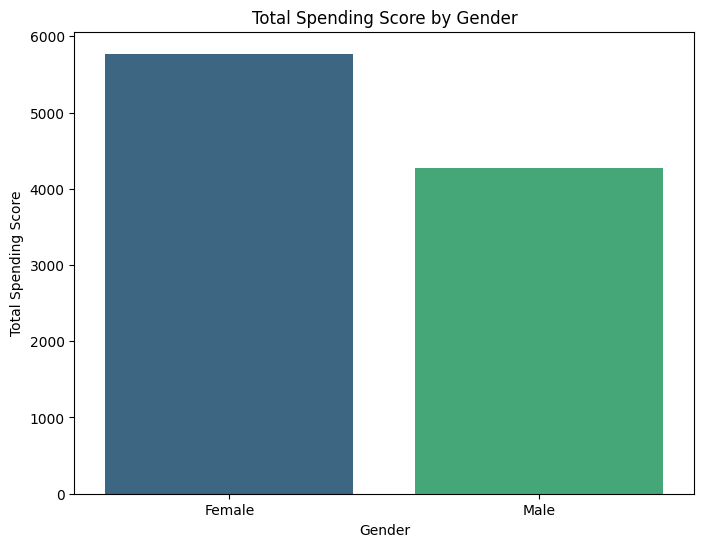

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of total spending scores by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=total_spending_by_gender.index, y=total_spending_by_gender.values, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Total Spending Score')
plt.title('Total Spending Score by Gender')
plt.show()

DISTRIBUTION OF SPENDING SCORES BY GENDER

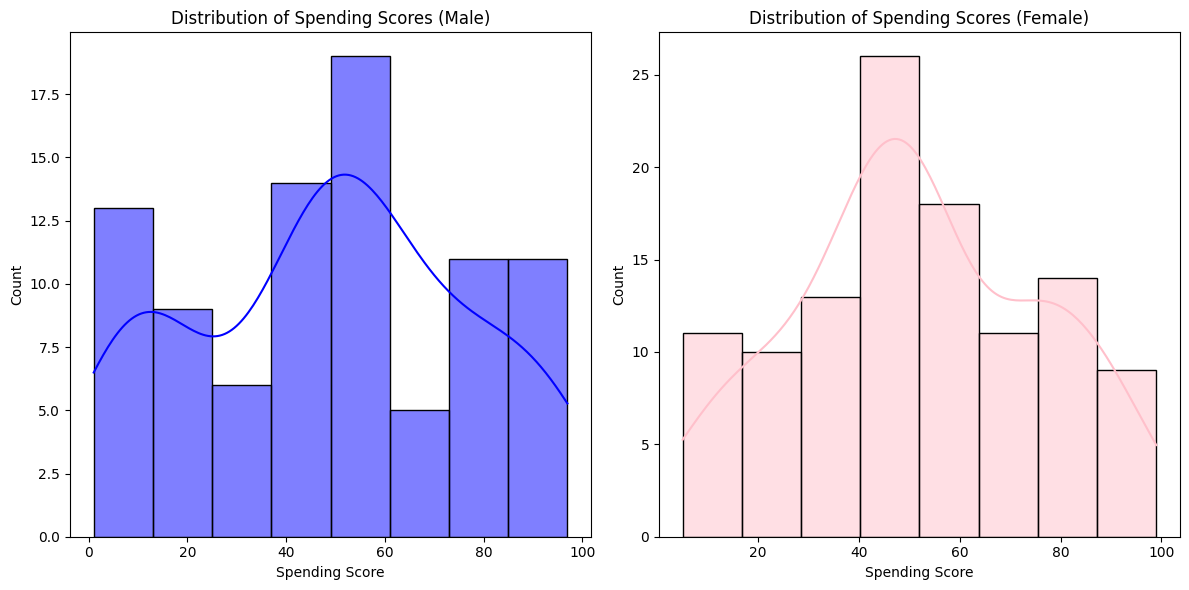

In [ ]:
# Distribution of spending scores by gender
plt.figure(figsize=(12, 6))

# Male spending scores
plt.subplot(1, 2, 1)
sns.histplot(data[data['Gender'] == 0]['Spending Score'], kde=True, color='blue')
plt.title('Distribution of Spending Scores (Male)')

# Female spending scores
plt.subplot(1, 2, 2)
sns.histplot(data[data['Gender'] == 1]['Spending Score'], kde=True, color='pink')
plt.title('Distribution of Spending Scores (Female)')

plt.tight_layout()
plt.show()

DISTRIBUTION OF SPENDING SCORES BY AGE AND ANNUAL INCOME

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

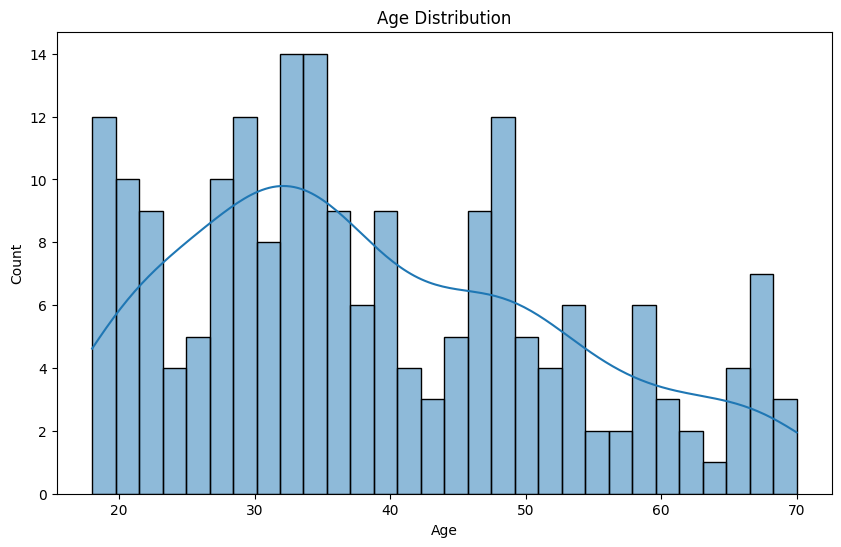

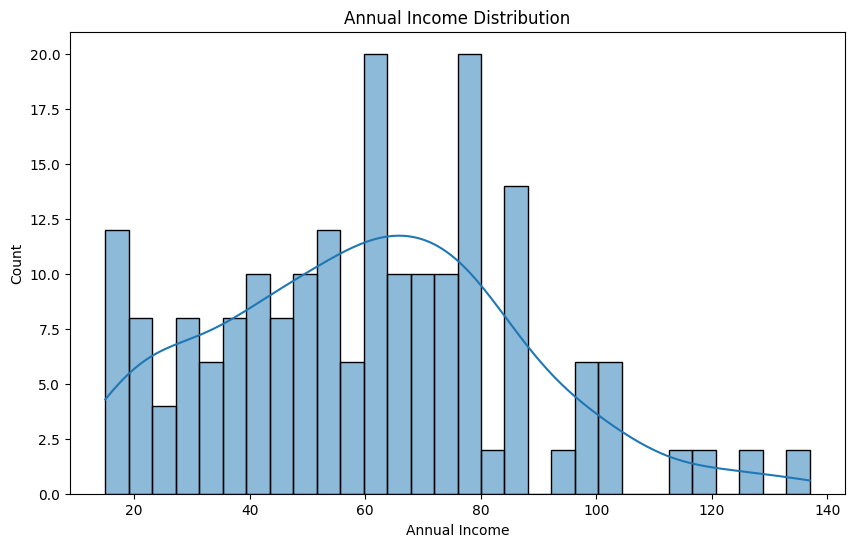

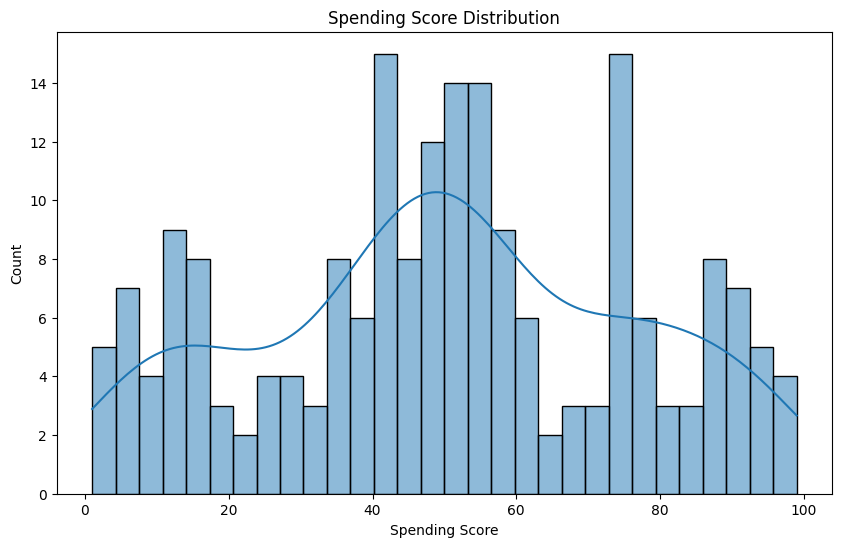

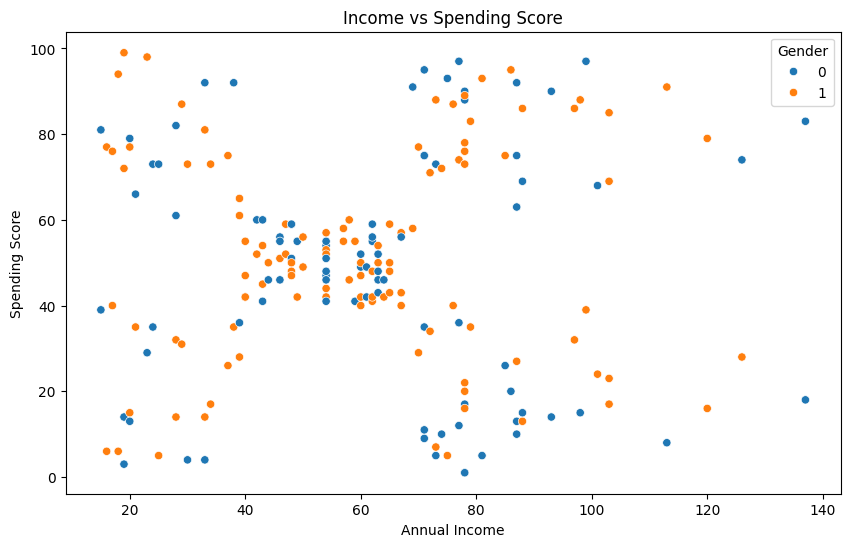

In [ ]:
#histplot-Age,Annual income,Spending score
# Visualizing distributions
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.show()

# Visualizing relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income', y='Spending Score', hue='Gender')
plt.title('Income vs Spending Score')
plt.show()

BOX PLOT OF SPENDING BY GENDER

<ipython-input-17-9d84768e9d6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score', data=data, palette='viridis')


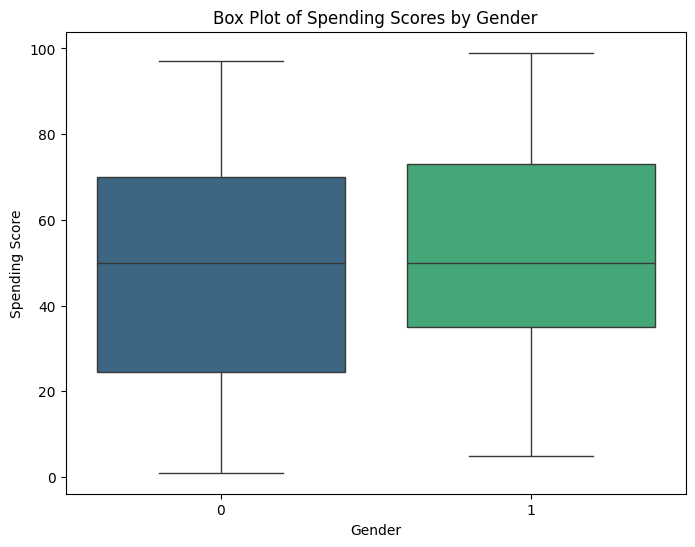

In [ ]:
# Box plot of spending scores by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score', data=data, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Box Plot of Spending Scores by Gender')
plt.show()

K-MEANS ALGORITHM

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


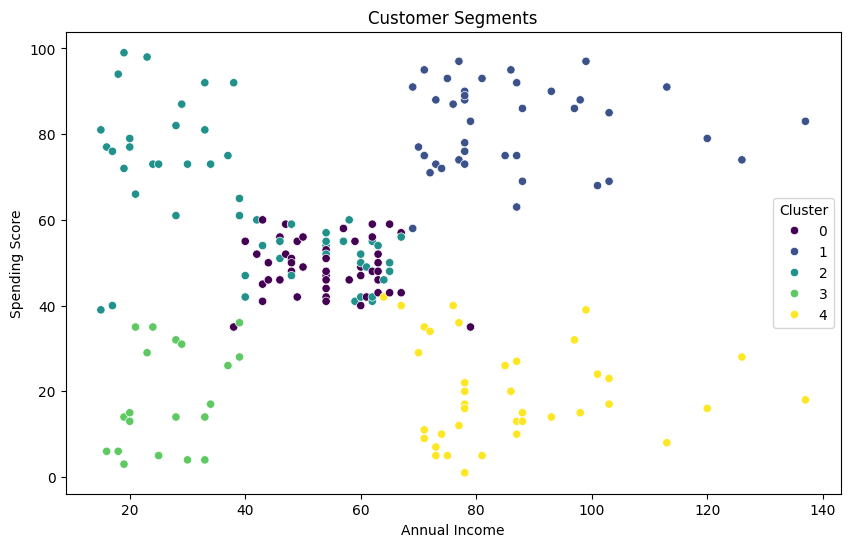

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature selection
features = data[['Age', 'Annual Income', 'Spending Score']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluating cluster quality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income', y='Spending Score', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()